In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from typing import Dict , Any
from sklearn.metrics import classification_report, accuracy_score
import joblib
import re

print("Starting the expense categorizer training process,")

Starting the expense categorizer training process,


In [4]:
df = pd.read_csv('data/dataset.csv')
df

,Transaction,Category
0,zomato food order,Food & Dining
1,swiggy food delivery,Food & Dining
2,dinner at barbeque nation,Food & Dining
3,dominos pizza purchase,Food & Dining
4,paradise biryani house,Food & Dining
...,...,...
150,chegg subscription,Education
151,online coding class fee,Education
152,library membership fee,Education
153,educational seminar ticket,Education


In [6]:
df = pd.read_csv('data/dataset.csv')

# text cleaning
df['Clean_Transaction'] = (
    df['Transaction'] 
    .str.lower()                           # 1. Lowercase text
    .str.replace(r'\d+', '', regex=True)   # 2. Remove numbers
    .str.replace(r'\s+', ' ', regex=True)  # 3. Replace multiple spaces with one
    .str.strip()                           # 4. Remove spaces
)
print(df.head())

                 Transaction       Category          Clean_Transaction
0          zomato food order  Food & Dining          zomato food order
1       swiggy food delivery  Food & Dining       swiggy food delivery
2  dinner at barbeque nation  Food & Dining  dinner at barbeque nation
3     dominos pizza purchase  Food & Dining     dominos pizza purchase
4     paradise biryani house  Food & Dining     paradise biryani house


In [7]:
# Feature Engineering (TF-IDF) 
# Initiaize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)

# X-features and y-target vector
X = tfidf_vectorizer.fit_transform(df['Clean_Transaction'])
y = df['Category']

print(f"\nShape of TF-IDF matrix: {X.shape}")


Shape of TF-IDF matrix: (155, 312)


In [8]:
# Train-Test Split
# remove categories with less than 2 samples
valid_categories = df['Category'].value_counts()[df['Category'].value_counts() >= 2].index
filtered_df = df[df['Category'].isin(valid_categories)]

X_filtered = tfidf_vectorizer.transform(filtered_df['Clean_Transaction'])
y_filtered = filtered_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered)

print(f"\nTraining data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")


Training data size: 108 samples
Testing data size: 47 samples


In [10]:
model = MultinomialNB()

# The rest of the code is exactly the same
model.fit(X_train, y_train)
print("Model training complete using MultinomialNB.")

Model training complete using MultinomialNB.


In [11]:
# Model Evaluation 
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification report:")
print(report)



Model Accuracy: 0.5532

Classification report:
                   precision    recall  f1-score   support

Bills & Utilities       0.75      0.60      0.67         5
        Education       0.00      0.00      0.00         4
    Entertainment       0.67      0.40      0.50         5
    Food & Dining       0.45      0.71      0.56         7
        Groceries       1.00      0.50      0.67         4
Health & Wellness       0.00      0.00      0.00         4
    Personal Care       1.00      0.25      0.40         4
         Shopping       0.43      0.86      0.57         7
           Travel       0.58      1.00      0.74         7

         accuracy                           0.55        47
        macro avg       0.54      0.48      0.46        47
     weighted avg       0.54      0.55      0.49        47



c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

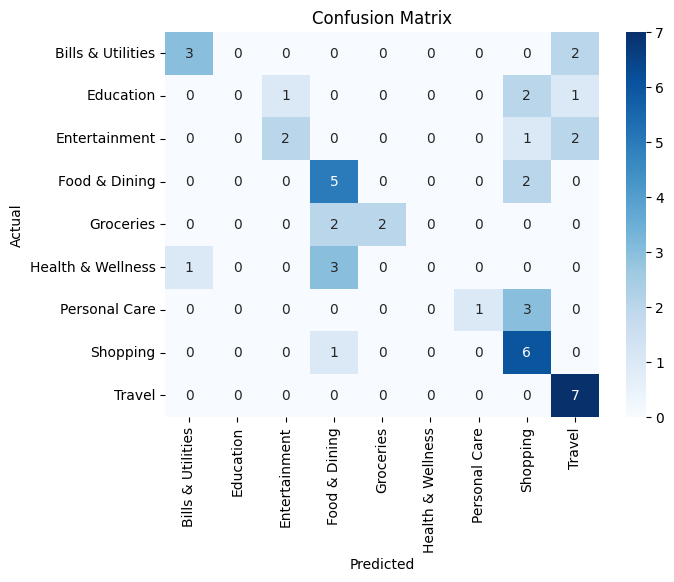

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Save the Model and Vectorizer 
joblib.dump(model, 'expense_model.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("\nModel and vectorizer have been saved as 'expense_model.joblib' and 'tfidf_vectorizer.joblib'")


Model and vectorizer have been saved as 'expense_model.joblib' and 'tfidf_vectorizer.joblib'


In [26]:
# Prediction Function Example 
def predict_category(transaction_text):
    
    """ Predicts the category for a new transaction text."""
    # Load the saved model and vectorizer
    loaded_model = joblib.load('expense_model.joblib')
    loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')
    
    # Clean the input text
    cleaned_text = clean_text(transaction_text)
    
    # Vectorize the text using the loaded vectorizer
    text_vectorized = loaded_vectorizer.transform([cleaned_text])
    
    # Predict the category
    prediction = loaded_model.predict(text_vectorized)
    
    return prediction[0]

In [27]:
# Example Usage 
print("\nTesting the prediction function")
new_transaction_1 = "uber ride home 230"
new_transaction_2 = "dinner at paradise hotel"
new_transaction_3 = "grocery shopping at walmart"

def clean_text(text):
    text = text.lower()                           # 1. Lowercase text
    text = re.sub(r'\d+', '', text)               # 2. Remove numbers
    text = re.sub(r'\s+', ' ', text)              # 3. Replace multiple spaces with one
    text = text.strip()                           # 4. Remove leading/trailing spaces
    return text
print(f"'{new_transaction_1}' is categorized as: {predict_category(new_transaction_1)}")
print(f"'{new_transaction_2}' is categorized as: {predict_category(new_transaction_2)}")


Testing the prediction function
'uber ride home 230' is categorized as: Travel
'dinner at paradise hotel' is categorized as: Food & Dining
